<a href="https://colab.research.google.com/github/CamilleGreen5/Deep_Learning_with_Python/blob/master/Noise_speech_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydub

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.io.wavfile import read, write
from scipy.signal import stft, istft
import glob
from pydub import AudioSegment

In [4]:
!wget https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-5.1-2020-06-22/fr.tar.gz

--2020-09-14 07:08:58--  https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-5.1-2020-06-22/fr.tar.gz
Resolving voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com (voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com)... 52.218.216.243
Connecting to voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com (voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com)|52.218.216.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16959458032 (16G) [application/octet-stream]
Saving to: ‘fr.tar.gz’

fr.tar.gz           100%[===================>]  15.79G  36.3MB/s    in 7m 43s  

2020-09-14 07:16:41 (35.0 MB/s) - ‘fr.tar.gz’ saved [16959458032/16959458032]



In [5]:
!tar -xf fr.tar.gz

In [ ]:
!ls cv-corpus-5.1-2020-06-22/fr/clips

In [7]:
list_mp3_files = glob.glob("./cv-corpus-5.1-2020-06-22/fr/clips/*.mp3")
print(list_mp3_files[:20])

['./cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_18157595.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_20839039.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_19741811.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_20829250.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_18215892.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_18646030.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_20320167.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_19454893.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_19798198.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_18588960.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_22073625.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_17816334.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_20464898.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voice_fr_20336478.mp3', './cv-corpus-5.1-2020-06-22/fr/clips/common_voi

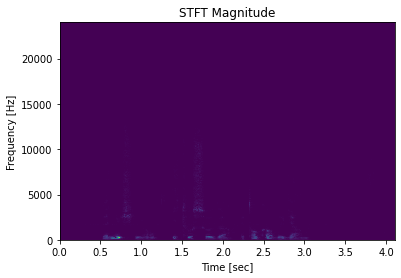

In [14]:
for i, path_to_mp3_file in enumerate(list_mp3_files[1:2]):

    # load mp3 sound to array
    loaded_sound = AudioSegment.from_mp3(path_to_mp3_file)
    array_sound = np.array(loaded_sound.get_array_of_samples(), np.float32)

    # save original to wav
    path_to_wav_file = './noised/noised_sound' + str(i) + '.wav'
    write(path_to_wav_file, 48000, array_sound)

    # normalize array
    mean = np.mean(array_sound, axis=0)
    std = np.std(array_sound)
    array_sound -= mean
    array_sound /= std

    # add random noise
    noise = np.random(0, 1, len(array_sound))
    noised_array_sound = np.add(noise, array_sound)

    # plot original and noisy
    plt.plot([i for i  in range(len(array_sound))], array_sound, 'b')
    plt.plot([i for i  in range(len(array_sound))], noised_array_sound, 'r')

    # convert sound to to F_T_space
    f, t, array_stft = stft(array_sound, fs=48000, nperseg=1000)
    array_abs_stft = np.abs(array_stft)

    plt.pcolormesh(t, f, array_abs_stft)
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


    # convert back to sound from F_T_space
    t, desnoised_array_sound = istft(array_stft, fs=48000, nperseg=1000)
    desnoised_array_sound = np.array(desnoised_array_sound)
    desnoised_array_sound *= std
    desnoised_array_sound += mean

    # save reconverted sound to wav
    path_to_wav_file = './denoised/denoised_sound' + str(i) + '.wav'
    write(path_to_wav_file, 48000, desnoised_array_sound)
    

